In [5]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra

In [6]:
using Flux
using Flux: logitcrossentropy, normalise, onecold, onehotbatch, crossentropy, throttle
using Parameters: @with_kw
using Flux: @epochs

┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1260


In [27]:
cv_data = load("../data/experiment/m1/conv_matrix-1.jld2")

cv_matrix = cv_data["cam_1"];

cv_matrix = cv_matrix[1:200, 1:300];

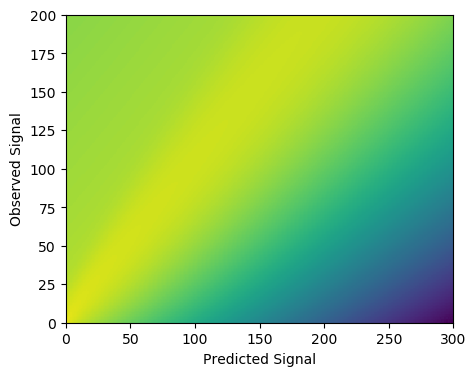

PyObject Text(24.000000000000007, 0.5, 'Observed Signal')

In [28]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.pcolormesh(log.(cv_matrix))

ax.set_xlabel("Predicted Signal")
ax.set_ylabel("Observed Signal")

In [66]:
x_data = []
y_data = []

for ind in CartesianIndices(cv_matrix)
    push!(x_data, [ind.I[1], ind.I[2]])
    append!(y_data, cv_matrix[ind])
end

x_data = hcat(x_data...)
y_data = y_data'

1×60000 Adjoint{Any,Array{Any,1}}:
 0.374229  0.0303909  0.0299269  0.0306415  …  0.000101744  0.000110844

In [67]:
train_data = Flux.Data.DataLoader(x_data, y_data, batchsize=256, shuffle=true)

Flux.Data.DataLoader(([1 2 … 199 200; 1 1 … 300 300], Any[0.3742294245565368 0.030390908365604728 … 0.00010174369980794135 0.00011084440456140689]), 256, 60000, true, 60000, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  59991, 59992, 59993, 59994, 59995, 59996, 59997, 59998, 59999, 60000], true)

In [68]:
accuracy(x, y, model) = sum((model(x) .- y).^2)
loss(x, y) = crossentropy(model(x), y)  #sum((model(x) .- y).^2)

loss (generic function with 1 method)

In [69]:
model = Chain(Flux.Dense(2, 5, sigmoid), Flux.Dense(5, 1), softmax)

Chain(Dense(2, 5, σ), Dense(5, 1), softmax)

In [70]:
loss_vector_train = Float64[]

evalcb = () -> begin 
    los_train = loss(x_data, y_data)
    push!(loss_vector_train, los_train)
    @show los_train
end

#13 (generic function with 1 method)

In [71]:
# optimiser = Descent(0.5)
optimiser = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

In [72]:
@time @epochs 200 Flux.train!(loss, Flux.params(model), train_data, optimiser, cb = throttle(evalcb, 80))

┌ Info: Epoch 1
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 2
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 3
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 4
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 5
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 6
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 7
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 8
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 9
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 10
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 11
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 12
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 13
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 14
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 15
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 16
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 17
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 18
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 19
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 20
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 21
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 22
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 23
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 24
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 25
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 26
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 27
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 28
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 29
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 30
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 31
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 32
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 33
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 34
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 35
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 36
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 37
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 38
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 39
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 40
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 41
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 42
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 43
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 44
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 45
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 46
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 47
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 48
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 49
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 50
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 51
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 52
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 53
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 54
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 55
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 56
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 57
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 58
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 59
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 60
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 61
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 62
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 63
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 64
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 65
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 66
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 67
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 68
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 69
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 70
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 71
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 72
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 73
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 74
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 75
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 76
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 77
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 78
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 79
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 80
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 81
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 82
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 83
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 84
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 85
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 86
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 87
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 88
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 89
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 90
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 91
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 92
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 93
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 94
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 95
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 96
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 97
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 98
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 99
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 100
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 101
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 102
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 103
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 104
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 105
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 106
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 107
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 108
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 109
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 110
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 111
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 112
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 113
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 114
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 115
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 116
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 117
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 118
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 119
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 120
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 121
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 122
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 123
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 124
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 125
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 126
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 127
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 128
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 129
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 130
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 131
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 132
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 133
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 134
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 135
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 136
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 137
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 138
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 139
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 140
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 141
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 142
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 143
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 144
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 145
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 146
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 147
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0

┌ Info: Epoch 148
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121



los_train = -0.0


┌ Info: Epoch 149
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 150
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 151
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 152
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 153
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 154
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 155
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 156
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 157
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 158
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 159
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 160
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 161
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 162
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 163
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 164
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 165
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 166
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 167
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 168
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 169
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 170
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 171
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 172
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 173
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 174
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 175
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 176
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0

┌ Info: Epoch 177
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121



los_train = -0.0


┌ Info: Epoch 178
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 179
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 180
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 181
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 182
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 183
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 184
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 185
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 186
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 187
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 188
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 189
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 190
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 191
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 192
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 193
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 194
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 195
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 196
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 197
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121
┌ Info: Epoch 198
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0
los_train = -0.0


┌ Info: Epoch 199
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


los_train = -0.0


┌ Info: Epoch 200
└ @ Main /Users/vhafych/.julia/packages/Flux/Fj3bt/src/optimise/train.jl:121


 34.213306 seconds (215.15 M allocations: 9.447 GiB, 20.65% gc time)
